In [1]:
%matplotlib inline
from copy import deepcopy as copy
import json
import os

import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size

cc = np.concatenate


FILE = 'PARAM_SWEEP_RESULTS_0_W_PC_PC_L_PC_PC.txt'

# load header data and smln results
with open(FILE, 'r') as f:
    
    tmp = json.loads(f.readline())
    
    SWEEP_PARAMS = tmp['SWEEP_PARAMS']
    M_PARAMS = tmp['M_PARAMS']
    S_PARAMS = tmp['S_PARAMS']
    A_PARAMS = tmp['A_PARAMS']
    
    rslts = [json.loads(l) for l in f.readlines()[1:]]
    
PARAM_0 = SWEEP_PARAMS['VARY'][0]
PARAM_1 = SWEEP_PARAMS['VARY'][1]

# Event and unidirectional replay count

MIN EVT CT =  0.0
MAX EVT CT =  61.5


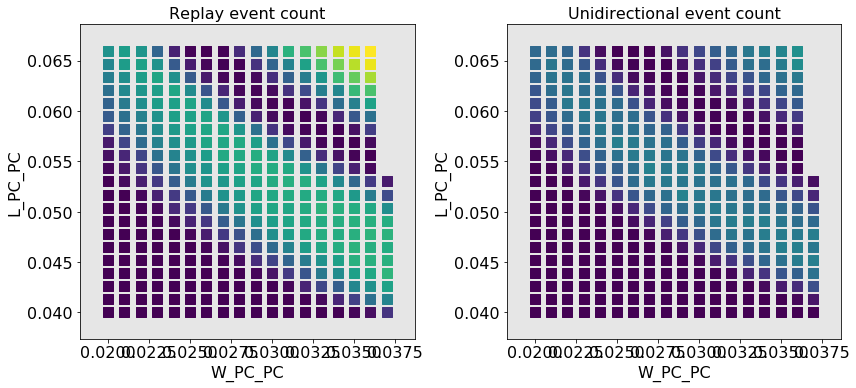

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5.5), tight_layout=True)

# event count
ax = axs[0]

def extract(metrics):
    return np.mean([v['evt_ct'] for v in metrics.values()])

x_min = np.min([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_max = np.max([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_range = x_max - x_min

y_min = np.min([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_max = np.max([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_range = y_max - y_min

v_min = np.min([extract(rslt['METRICS']) for rslt in rslts])
v_max = np.max([extract(rslt['METRICS']) for rslt in rslts])

print('MIN EVT CT = ', v_min)
print('MAX EVT CT = ', v_max)

# make scatter plot
for rslt in rslts:
    x = rslt['PARAMS'][PARAM_0]
    y = rslt['PARAMS'][PARAM_1]
    ax.scatter(x, y, c=extract(rslt['METRICS']), s=100, vmin=v_min, vmax=v_max, marker='s')
    
ax.set_xlim(x_min - .1*x_range, x_max + .1*x_range)
ax.set_ylim(y_min - .1*y_range, y_max + .1*y_range)
ax.set_xlabel(PARAM_0)
ax.set_ylabel(PARAM_1)
ax.set_facecolor((.9, .9, .9))
ax.set_title('Replay event count')

set_font_size(ax, 16)

# one way count
ax = axs[1]

def extract(metrics):
    return np.mean([v['one_way_ct'] for v in metrics.values()])

x_min = np.min([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_max = np.max([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_range = x_max - x_min

y_min = np.min([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_max = np.max([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_range = y_max - y_min

# make scatter plot
for rslt in rslts:
    x = rslt['PARAMS'][PARAM_0]
    y = rslt['PARAMS'][PARAM_1]
    ax.scatter(x, y, c=extract(rslt['METRICS']), s=100, vmin=v_min, vmax=v_max, marker='s')
    
ax.set_xlim(x_min - .1*x_range, x_max + .1*x_range)
ax.set_ylim(y_min - .1*y_range, y_max + .1*y_range)
ax.set_xlabel(PARAM_0)
ax.set_ylabel(PARAM_1)
ax.set_facecolor((.9, .9, .9))
ax.set_title('Unidirectional event count')

set_font_size(ax, 16)

# Trajectory/non-trajectory cells active during candidate replay events

MIN FR_TRJ =  3.1965073348914093
MAX FR_TRJ =  15.48798860710627
MIN FR_NTRJ =  0.025779385092015224
MAX FR_NTRJ =  15.446824596450734


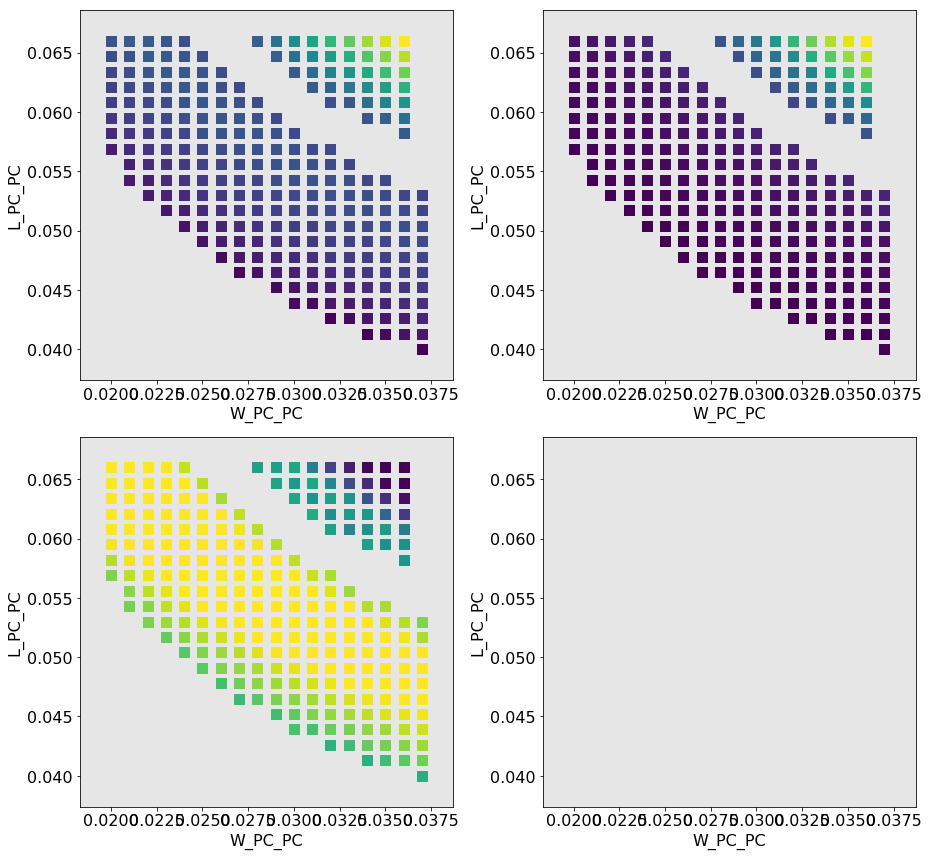

In [3]:
MIN_EVT_CT = 3

def extract(metrics):
    
    if np.mean([v['evt_ct'] for v in metrics.values()]) > MIN_EVT_CT:
        
        tmp = [v['fr_trj'] for v in metrics.values() if v['evt_ct'] > 3]
        fr_trj = np.mean(tmp) if tmp else np.nan
        
        tmp = [v['fr_ntrj'] for v in metrics.values() if v['evt_ct'] > 3]
        fr_ntrj = np.mean(tmp) if tmp else np.nan
        
        return fr_trj, fr_ntrj
    else:
        return np.nan, np.nan
    

x_min = np.min([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_max = np.max([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_range = x_max - x_min

y_min = np.min([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_max = np.max([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_range = y_max - y_min

v_min_0 = np.nanmin([extract(rslt['METRICS'])[0] for rslt in rslts])
v_max_0 = np.nanmax([extract(rslt['METRICS'])[0] for rslt in rslts])

v_min_1 = np.nanmin([extract(rslt['METRICS'])[1] for rslt in rslts])
v_max_1 = np.nanmax([extract(rslt['METRICS'])[1] for rslt in rslts])

print('MIN FR_TRJ = ', v_min_0)
print('MAX FR_TRJ = ', v_max_0)
print('MIN FR_NTRJ = ', v_min_1)
print('MAX FR_NTRJ = ', v_max_1)

# make scatter plot
fig, axs = plt.subplots(2, 2, figsize=(13, 12), tight_layout=True)
for rslt in rslts:
    x = rslt['PARAMS'][PARAM_0]
    y = rslt['PARAMS'][PARAM_1]
    fr_trj, fr_ntrj = extract(rslt['METRICS'])
    axs[0, 0].scatter(x, y, c=fr_trj, s=100, vmin=v_min_0, vmax=v_max_0, marker='s')
    axs[0, 1].scatter(x, y, c=fr_ntrj, s=100, vmin=v_min_1, vmax=v_max_1, marker='s')
    
    axs[1, 0].scatter(x, y, c=(fr_trj - fr_ntrj), s=100, vmin=v_min_1, vmax=5, marker='s')

for ax in axs.flatten():
    ax.set_xlim(x_min - .1*x_range, x_max + .1*x_range)
    ax.set_ylim(y_min - .1*y_range, y_max + .1*y_range)
    ax.set_xlabel(PARAM_0)
    ax.set_ylabel(PARAM_1)
    ax.set_facecolor((.9, .9, .9))

    set_font_size(ax, 16)